In [2]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import os


In [147]:
os.chdir('C:/Users/f8026379/Documents/MANP/1.Alteryx Projects/Capacity Dimensioning/W17_2019')

In [148]:
Erato=pd.read_excel('SP_355030_Traffic_Report.xls',sheet_name='BusyRop Traffic 4G')

In [149]:
Erato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9979 entries, 0 to 9978
Data columns (total 22 columns):
Cell                      9979 non-null object
eNodeB                    9979 non-null object
Site                      9979 non-null object
Implementation            9979 non-null object
GdC                       9979 non-null int64
Layer                     9979 non-null int64
Over_Target               9979 non-null int64
BusyRop_Time              9979 non-null int64
BusyRop_VoLTE_Erl         9979 non-null object
BusyRop_Data_Mbps         9979 non-null float64
BusyRop_Volume_Kbps       9979 non-null float64
OverTarget_VoLTE_Erl      9979 non-null object
OverTarget_Data_Mbps      9979 non-null float64
OverTarget_Volume_Kbps    9979 non-null float64
Max_VoLTE_Time            9979 non-null object
Max_VoLTE_Erl             9979 non-null object
Max_Data_Time             9979 non-null int64
Max_Data_Mbps             9979 non-null float64
Max_Volume_Time           9979 non-null int64
M

In [150]:
Vol_corr=Erato[['Layer','BusyRop_Data_Mbps','BusyRop_Volume_Kbps']]

In [151]:
Vol_corr['BusyRop_Volume_Mbps']=Vol_corr.BusyRop_Volume_Kbps/1000

C:\Users\f8026379\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [152]:
Vol_corr.head()

,Layer,BusyRop_Data_Mbps,BusyRop_Volume_Kbps,BusyRop_Volume_Mbps
0,1800,15.68,22348.90,22.34890
1,1800,15.65,16325.26,16.32526
2,1800,15.60,27161.86,27.16186
3,1800,15.56,21243.01,21.24301
4,1800,15.55,17533.57,17.53357


In [153]:
#filtro=Vol_corr[Vol_corr['Layer'].isin([2600])]

In [154]:
#plt.hist(filtro['BusyRop_Data_Mbps'],bins=30)

In [155]:
#plt.hist(filtro['BusyRop_Volume_Kbps'],bins=30)

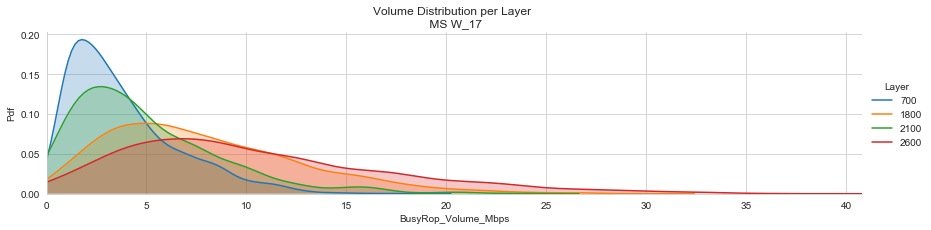

In [225]:
fig = sns.FacetGrid(Vol_corr,hue='Layer',aspect=4)
fig.map(sns.kdeplot,'BusyRop_Volume_Mbps',shade=True)
maxvol=Vol_corr['BusyRop_Volume_Mbps'].max()
fig.set(xlim=(0,maxvol))
fig.add_legend()
plt.savefig('Volume_medido')
plt.ylabel('Pdf')
plt.title('Volume Distribution per Layer \n MS W_17')
plt.savefig('Volume_medido')

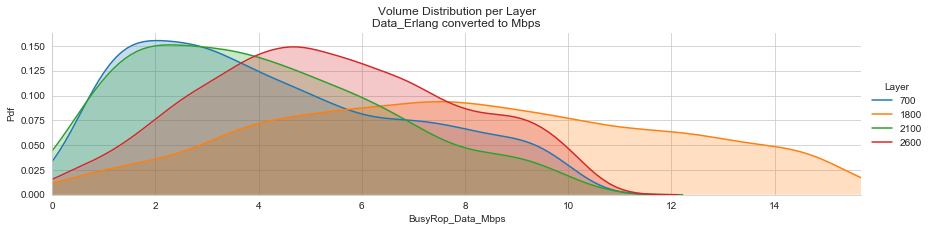

In [226]:
fig = sns.FacetGrid(Vol_corr,hue='Layer',aspect=4)
fig.map(sns.kdeplot,'BusyRop_Data_Mbps',shade=True)
maxvol=Vol_corr['BusyRop_Data_Mbps'].max()
fig.set(xlim=(0,maxvol))
fig.add_legend()
plt.ylabel('Pdf')
plt.title('Volume Distribution per Layer\nData_Erlang converted to Mbps')
plt.savefig('Volume_convertido')

In [158]:
Erato_projected=pd.read_excel('SP_355030_Traffic_Report.xls',sheet_name='Projected Traffic 4G')

In [159]:
Vol_corr_projected=Erato_projected[['Layer','BusyRop_Data_Mbps','BusyRop_Volume_Kbps']]

In [160]:
Vol_corr_projected.head()

,Layer,BusyRop_Data_Mbps,BusyRop_Volume_Kbps
0,1800,18.94,11445.94
1,1800,0.28,105.69
2,1800,0.00,0.00
3,1800,11.33,1255.18
4,1800,9.22,1804.68


In [161]:
Vol_corr_projected['BusyRop_Volume_Mbps']=Vol_corr_projected.BusyRop_Volume_Kbps/1000

C:\Users\f8026379\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [162]:
Vol_corr_projected.head()

,Layer,BusyRop_Data_Mbps,BusyRop_Volume_Kbps,BusyRop_Volume_Mbps
0,1800,18.94,11445.94,11.44594
1,1800,0.28,105.69,0.10569
2,1800,0.00,0.00,0.00000
3,1800,11.33,1255.18,1.25518
4,1800,9.22,1804.68,1.80468


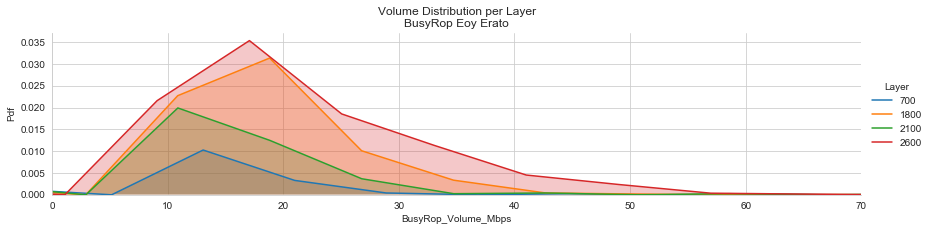

In [229]:
fig = sns.FacetGrid(Vol_corr_projected,hue='Layer',aspect=4)
fig.map(sns.kdeplot,'BusyRop_Volume_Mbps',shade=True)
#maxvol=Vol_corr_projected['BusyRop_Volume_Mbps'].max()
fig.set(xlim=(0,70))
fig.add_legend()
plt.ylabel('Pdf')
plt.title('Volume Distribution per Layer\nBusyRop Eoy Erato')
plt.savefig('Volume_projetado_medido')

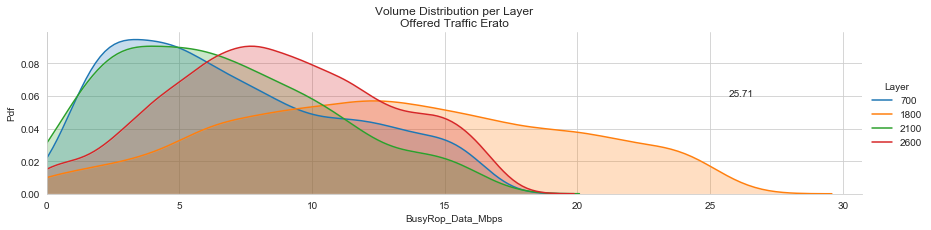

In [231]:
fig = sns.FacetGrid(Vol_corr_projected,hue='Layer',aspect=4)
fig.map(sns.kdeplot,'BusyRop_Data_Mbps',shade=True,)
maxvol=Vol_corr_projected['BusyRop_Data_Mbps'].max()
fig.set(xlim=(0,maxvol+5))
fig.add_legend()
plt.ylabel('Pdf')
plt.title('Volume Distribution per Layer\nOffered Traffic Erato')
plt.text(maxvol,0.06,maxvol)
plt.savefig('Volume_projetado_Erato')


In [165]:
Vol_corr_projected.describe()

,Layer,BusyRop_Data_Mbps,BusyRop_Volume_Kbps,BusyRop_Volume_Mbps
count,9979.000000,9979.000000,9979.000000,9979.000000
mean,1756.017637,9.626469,16055.238395,16.055238
std,728.576988,5.671282,63873.806940,63.873807
min,700.000000,0.000000,0.000000,0.000000
25%,700.000000,5.260000,5080.665000,5.080665
50%,1800.000000,8.980000,9798.850000,9.798850
75%,2600.000000,13.360000,16676.335000,16.676335
max,2600.000000,25.710000,1000000.000000,1000.000000


In [166]:
Erato.head()

,Cell,eNodeB,Site,Implementation,GdC,Layer,Over_Target,BusyRop_Time,BusyRop_VoLTE_Erl,BusyRop_Data_Mbps,...,OverTarget_Data_Mbps,OverTarget_Volume_Kbps,Max_VoLTE_Time,Max_VoLTE_Erl,Max_Data_Time,Max_Data_Mbps,Max_Volume_Time,Max_Volume_kbps,Percentage_Invalid,Unnamed: 21
0,SLSPSM62K,SLSPSM62,SPSPO12367,ERI,355030,1800,1,21,N.D.,15.68,...,2.54,9248.90,N.D.,N.D.,21,15.68,21,22348.90,0,NaN
1,SLSPAA29I,SLSPAA29,SPSPO12036,ERI,355030,1800,1,9,N.D.,15.65,...,2.51,3225.26,N.D.,N.D.,9,15.65,9,16325.26,0,NaN
2,SLSPVS05K,SLSPVS05,SPSPO_0502,ERI,355030,1800,1,19,N.D.,15.60,...,2.47,14061.86,N.D.,N.D.,19,15.60,19,27161.86,0,NaN
3,SLSPIT16K,SLSPIT16,SPSPO11975,ERI,355030,1800,1,21,N.D.,15.56,...,2.43,8143.01,N.D.,N.D.,21,15.56,21,21243.01,0,NaN
4,SLSPJH08J,SLSPJH08,SPSPO12191,ERI,355030,1800,1,22,N.D.,15.55,...,2.41,4433.57,N.D.,N.D.,22,15.55,22,17533.57,0,NaN


In [199]:
Comparativo=pd.merge(Erato,Erato_projected,on=['Cell','eNodeB','Site','Layer','GdC'],suffixes=('_w17','_EoY'))
Comparativo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9979 entries, 0 to 9978
Data columns (total 31 columns):
Cell                          9979 non-null object
eNodeB                        9979 non-null object
Site                          9979 non-null object
Implementation_w17            9979 non-null object
GdC                           9979 non-null int64
Layer                         9979 non-null int64
Over_Target_w17               9979 non-null int64
BusyRop_Time                  9979 non-null int64
BusyRop_VoLTE_Erl_w17         9979 non-null object
BusyRop_Data_Mbps_w17         9979 non-null float64
BusyRop_Volume_Kbps_w17       9979 non-null float64
OverTarget_VoLTE_Erl_w17      9979 non-null object
OverTarget_Data_Mbps_w17      9979 non-null float64
OverTarget_Volume_Kbps_w17    9979 non-null float64
Max_VoLTE_Time                9979 non-null object
Max_VoLTE_Erl                 9979 non-null object
Max_Data_Time                 9979 non-null int64
Max_Data_Mbps              

In [200]:
Comparativo.head()

,Cell,eNodeB,Site,Implementation_w17,GdC,Layer,Over_Target_w17,BusyRop_Time,BusyRop_VoLTE_Erl_w17,BusyRop_Data_Mbps_w17,...,Unnamed: 21,Implementation_EoY,Over_Target_EoY,BusyRop_VoLTE_Erl_EoY,BusyRop_Data_Mbps_EoY,BusyRop_Volume_Kbps_EoY,OverTarget_VoLTE_Erl_EoY,OverTarget_Data_Mbps_EoY,OverTarget_Volume_Kbps_EoY,Unnamed: 13
0,SLSPSM62K,SLSPSM62,SPSPO12367,ERI,355030,1800,1,21,N.D.,15.68,...,NaN,MULTIRAT,1,N.D.,25.71,36651.91,N.D.,12.57,23551.91,NaN
1,SLSPAA29I,SLSPAA29,SPSPO12036,ERI,355030,1800,1,9,N.D.,15.65,...,NaN,MULTIRAT,1,N.D.,25.66,26773.43,N.D.,12.52,13673.43,NaN
2,SLSPVS05K,SLSPVS05,SPSPO_0502,ERI,355030,1800,1,19,N.D.,15.60,...,NaN,MULTIRAT,1,N.D.,25.59,44545.45,N.D.,12.45,31445.45,NaN
3,SLSPIT16K,SLSPIT16,SPSPO11975,ERI,355030,1800,1,21,N.D.,15.56,...,NaN,MULTIRAT,1,N.D.,25.52,34837.99,N.D.,12.38,21737.99,NaN
4,SLSPJH08J,SLSPJH08,SPSPO12191,ERI,355030,1800,1,22,N.D.,15.55,...,NaN,MULTIRAT,1,N.D.,25.50,28755.05,N.D.,12.36,15655.05,NaN


In [204]:
comp=Comparativo[['Layer','BusyRop_Data_Mbps_w17','BusyRop_Data_Mbps_EoY','BusyRop_Volume_Kbps_w17','BusyRop_Volume_Kbps_EoY']]

In [205]:
comp.head()

,Layer,BusyRop_Data_Mbps_w17,BusyRop_Data_Mbps_EoY,BusyRop_Volume_Kbps_w17,BusyRop_Volume_Kbps_EoY
0,1800,15.68,25.71,22348.90,36651.91
1,1800,15.65,25.66,16325.26,26773.43
2,1800,15.60,25.59,27161.86,44545.45
3,1800,15.56,25.52,21243.01,34837.99
4,1800,15.55,25.50,17533.57,28755.05


In [206]:
comp.describe()

,Layer,BusyRop_Data_Mbps_w17,BusyRop_Data_Mbps_EoY,BusyRop_Volume_Kbps_w17,BusyRop_Volume_Kbps_EoY
count,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000
mean,1756.017637,5.905701,9.626469,7320.684657,16055.238395
std,728.576988,3.443920,5.671282,5637.886046,63873.806940
min,700.000000,-3.000000,0.000000,-3.000000,0.000000
25%,700.000000,3.260000,5.260000,3085.485000,5080.665000
50%,1800.000000,5.480000,8.980000,5951.230000,9798.850000
75%,2600.000000,8.160000,13.360000,10086.290000,16676.335000
max,2600.000000,15.680000,25.710000,40785.540000,1000000.000000


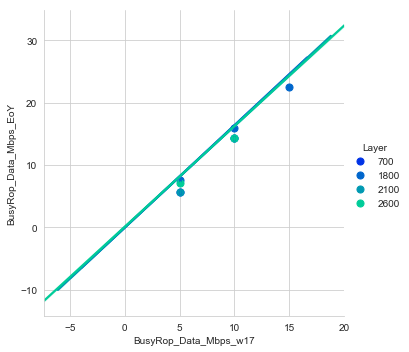

In [211]:
mbps=[5,10,15,20,25,30,35,40]
sns.lmplot('BusyRop_Data_Mbps_w17','BusyRop_Data_Mbps_EoY',hue='Layer',data=comp,x_bins=mbps,palette='winter')

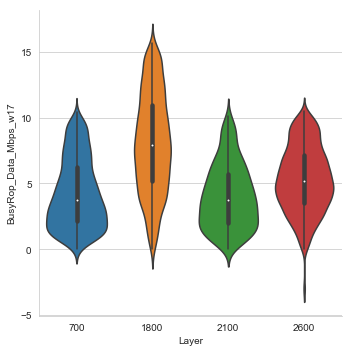

In [213]:
sns.catplot('Layer','BusyRop_Data_Mbps_w17',data=comp,kind='violin',)

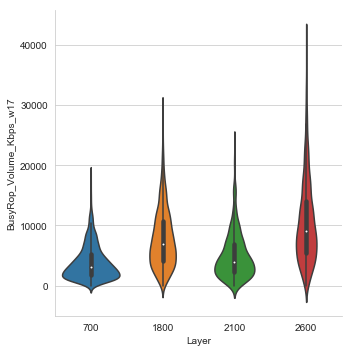

In [214]:
sns.catplot('Layer','BusyRop_Volume_Kbps_w17',data=comp,kind='violin')

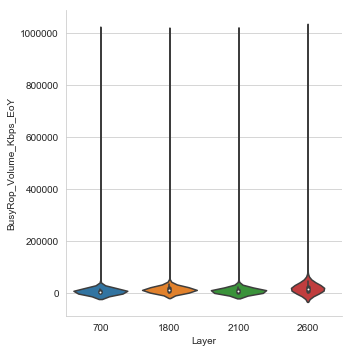

In [215]:
sns.catplot('Layer','BusyRop_Volume_Kbps_EoY',data=comp,kind='violin')

In [217]:
comp['Volume_Busy_Eoy_comp']=comp['BusyRop_Volume_Kbps_w17']*1.64

C:\Users\f8026379\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [218]:
comp.head()

,Layer,BusyRop_Data_Mbps_w17,BusyRop_Data_Mbps_EoY,BusyRop_Volume_Kbps_w17,BusyRop_Volume_Kbps_EoY,Volume_Busy_Eoy_comp
0,1800,15.68,25.71,22348.90,36651.91,36652.1960
1,1800,15.65,25.66,16325.26,26773.43,26773.4264
2,1800,15.60,25.59,27161.86,44545.45,44545.4504
3,1800,15.56,25.52,21243.01,34837.99,34838.5364
4,1800,15.55,25.50,17533.57,28755.05,28755.0548


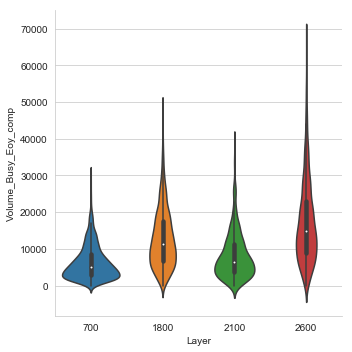

In [220]:
sns.catplot('Layer','Volume_Busy_Eoy_comp',data=comp,kind='violin')

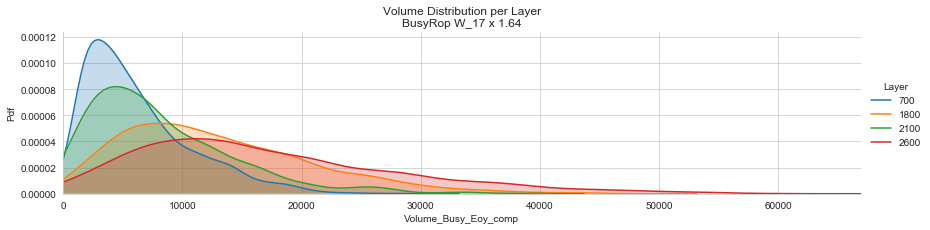

In [232]:
fig = sns.FacetGrid(comp,hue='Layer',aspect=4)
fig.map(sns.kdeplot,'Volume_Busy_Eoy_comp',shade=True,)
maxvol=comp['Volume_Busy_Eoy_comp'].max()
fig.set(xlim=(0,maxvol+5))
fig.add_legend()
plt.ylabel('Pdf')
plt.title('Volume Distribution per Layer\nBusyRop W_17 x 1.64')
#plt.text(maxvol,0.06,maxvol)
plt.savefig('Volume_projetado_Corrigido')